In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def srednia(df):
    suma = 0
    for element in df:
        suma += element
    return suma / len(df)

def odchylenie(df):
    suma = 0
    srednia_df = srednia(df)
    for i in df:
        suma += (i - srednia_df)**2
    return np.sqrt(suma / (len(df) - 1))

def wsp_korelacji_pearsona(df1, df2):
    n = len(df1)

    pearson = pd.DataFrame(df1[:])
    pearson['Y'] = df2[:]
    pearson['y2'] = df2 * df2
    pearson['xy'] = df1 * df2
    pearson['x2'] = df1* df1
    pearson['y2'] = df2 * df2
    pearson.loc['sum'] = pearson.sum()

    return (n * pearson['xy']['sum'] - pearson['X']['sum'] * pearson['Y']['sum']) / np.sqrt((len(df['X']) * pearson['x2']['sum'] - pearson['X']['sum']**2) * (n * pearson['y2']['sum'] - pearson['Y']['sum']**2))

In [3]:
df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]
df

,X,Y
0,1,4
1,2,6
2,3,9
3,4,11
4,5,18


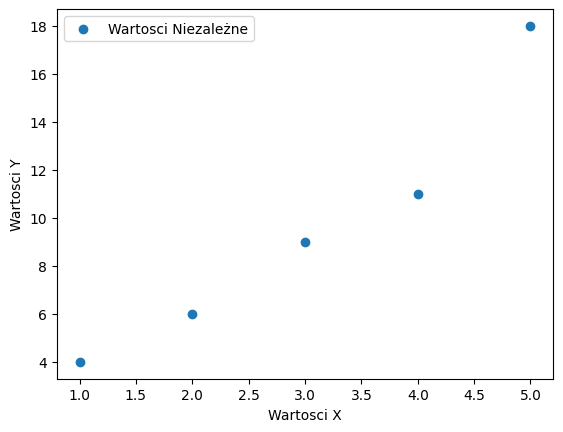

In [4]:
plt.scatter(df['X'], df['Y'], label='Wartosci Niezależne')
plt.xlabel('Wartosci X')
plt.ylabel('Wartosci Y')
plt.legend()
plt.show()

In [5]:
df.info

<bound method DataFrame.info of    X   Y
0  1   4
1  2   6
2  3   9
3  4  11
4  5  18>

In [6]:
np.mean(df['X'])

3.0

In [7]:
np.mean(df['Y'])

9.6

In [8]:
srednia_x = srednia(df['X'])
srednia_x

3.0

In [9]:
srednia_y = srednia(df['Y'])
srednia_y

9.6

In [10]:
Sx = odchylenie(df['X'])
Sx

1.5811388300841898

In [11]:
Sy = odchylenie(df['Y'])
Sy

5.412947441089743

In [12]:
n = len(df['X'])

pearson = pd.DataFrame(df[:])
pearson['y2'] = df['Y'] * df['Y']
pearson['xy'] = df['X'] * df['Y']
pearson['x2'] = df['X'] * df['X']
pearson['y2'] = df['Y'] * df['Y']
pearson.loc['sum'] = pearson.sum()

print("n = ", n)
print()
print(pearson)

n =  5

      X   Y   y2   xy  x2
0     1   4   16    4   1
1     2   6   36   12   4
2     3   9   81   27   9
3     4  11  121   44  16
4     5  18  324   90  25
sum  15  48  578  177  55


In [13]:
r = wsp_korelacji_pearsona(df['X'], df['Y'])
r

0.963940292431027

In [14]:
print("Srednia x: ", srednia_x)
print("Srednia y: ", srednia_y)
print("Odchylenie std: ", Sx)
print("Odchylenie std: ", Sy)
print("Współczynnik korelacji Pearsona: ", r)

Srednia x:  3.0
Srednia y:  9.6
Odchylenie std:  1.5811388300841898
Odchylenie std:  5.412947441089743
Współczynnik korelacji Pearsona:  0.963940292431027


In [15]:
b = r * (Sy/Sx)
b

3.3

In [16]:
a = srednia_y - b * srednia_x
a

-0.29999999999999893

In [17]:
def linia_regresji(x):
    return (b * x) + a

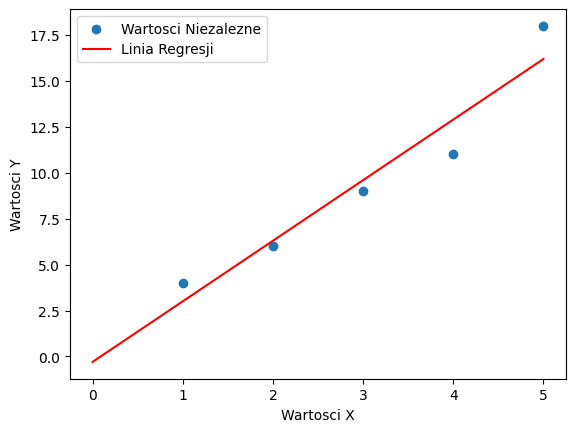

In [18]:
x = np.linspace(0, 5, 1000)
plt.scatter(df['X'], df['Y'], label='Wartosci Niezalezne')
plt.plot(x, linia_regresji(x), 'r', label='Linia Regresji')
plt.xlabel('Wartosci X')
plt.ylabel('Wartosci Y')
plt.legend()
plt.show()

In [19]:
df = df.append({'X': 6, 'Y': np.nan}, ignore_index=True)
df

AttributeError: 'DataFrame' object has no attribute 'append'

In [20]:
df = pd.concat([df, pd.DataFrame({'X': [6], 'Y': [np.nan]})], ignore_index=True)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,NaN


In [21]:
def predict_y(x, b, a):
    return b * x + a

In [22]:
df.at[5, 'Y'] = predict_y(df['X'][5], b, a)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5


In [23]:
df = pd.concat([df, pd.DataFrame({'X': [7], 'Y': [np.nan]})], ignore_index=True)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5
6,7,NaN


In [24]:
df.at[6, 'Y'] = predict_y(df['X'][6], b, a)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5
6,7,22.8


In [25]:
df = pd.concat([df, pd.DataFrame({'X': [8], 'Y': [np.nan]})], ignore_index=True)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5
6,7,22.8
7,8,NaN


In [27]:
df.at[7, 'Y'] = predict_y(df['X'][7], b, a)
df

,X,Y
0,1,4.0
1,2,6.0
2,3,9.0
3,4,11.0
4,5,18.0
5,6,19.5
6,7,22.8
7,8,26.1
